In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#파일 read 및 shape 확인
raw = pd.read_csv("kaggle_survey_2020_responses.csv")
raw.shape

c:\Temp\ipykernel_18140\306615676.py:2: DtypeWarning: Columns (0,18,31,45,50,63,80,92,99,105,130,171,187,241,254,266,278,289,307,322,330,342,353) have mixed types. Specify dtype option on import or set low_memory=False.
  raw = pd.read_csv("kaggle_survey_2020_responses.csv")


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


```python
pd.read_csv('파일명', encoding = 'cp949', low_memory = False)
```

csv파일에 한글이 포함되어 있는 경우에는 상기와 같이 encoding을 'cp949' 또는 'ms949'로 설정할 필요가 있다. 

low_memory옵션은 대용량의 데이터를 불러오는 경우 각 칼럼의 데이터 타입(dtype)을 추측하는 것이 매우 많은 메모리를 사용하기 때문에 대용량의 데이터를 불러올때 메모리 에러가 발생하는 경우 이를 False로 설정하거나 dtype을 명시해주어야한다.

In [ ]:
#head 확인
raw.head()

In [6]:
#질문 뽑아오기
question = raw.iloc[0]
question

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                           What is your age (# years)?
Q2                                                What is your gender? - Selected Choice
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
                                                             ...                        
Q35_B_Part_7                           In the next 2 years, do you hope to become mor...
Q35_B_Part_8                           In the next 2 years, do you hope to become mor...
Q35_B_Part_9                           In the next 2 years, do you hope to become mor...
Q35_B_Part_10                          In the next 2 years, do you hope to become mor...
Q35_B_OTHER                            In the next 2 years, do you hope to become mor...
Name: 0, Length: 355,

In [7]:
#질문을 제외한 답안데이터만 남기기
answer = raw.drop([0])
answer

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,126,18-21,Man,Turkey,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,566,55-59,Woman,United Kingdom of Great Britain and Northern I...,Master’s degree,Currently not employed,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20034,238,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20035,625,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,SQL,...,Weights & Biases,NaN,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN


In [8]:
#정보확인
answer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20036 entries, 1 to 20036
Columns: 355 entries, Time from Start to Finish (seconds) to Q35_B_OTHER
dtypes: object(355)
memory usage: 54.3+ MB


In [9]:
#question 에서 Q1 확인
question["Q1"]

'What is your age (# years)?'

In [10]:
#Q1 항목의 답안 count
Q1 = answer['Q1'].value_counts().sort_index()
Q1

Q1
18-21    3469
22-24    3786
25-29    4011
30-34    2811
35-39    1991
40-44    1397
45-49     988
50-54     698
55-59     411
60-69     398
70+        76
Name: count, dtype: int64

Text(0.5, 1.0, 'What is your age (# years)?')

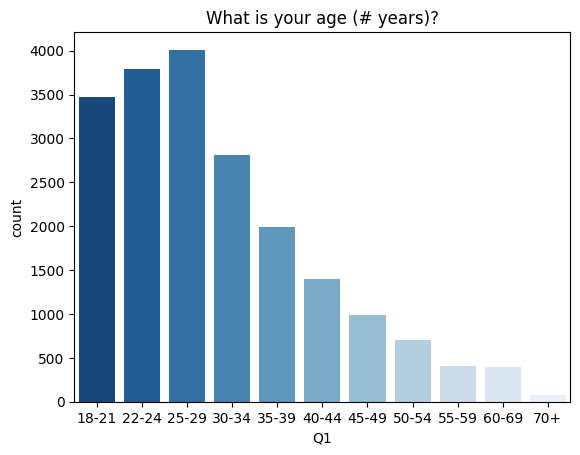

In [12]:
#Q1 plot
sns.countplot(
    data=answer.sort_values("Q1"),
    x="Q1", 
    palette="Blues_r"
).set_title(question["Q1"])

In [13]:
#Q2 항목의 답안에 대한 value count
question_no = 'Q2'

Q2 = answer[question_no].value_counts()
Q2

Q2
Man                        15789
Woman                       3878
Prefer not to say            263
Prefer to self-describe       54
Nonbinary                     52
Name: count, dtype: int64

Text(0.5, 1.0, 'Q2')

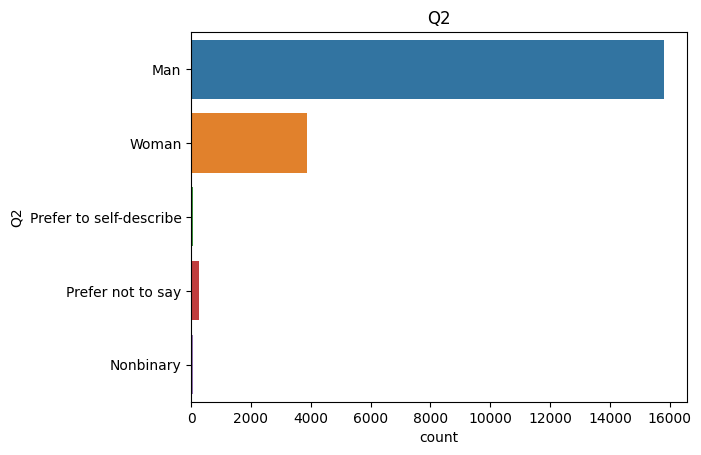

In [14]:
#Q2 Plot
sns.countplot(data = answer, y = question_no).set_title(question_no)

<Axes: xlabel='Q1'>

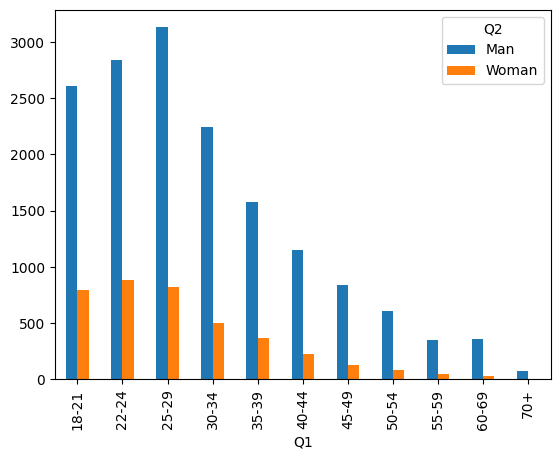

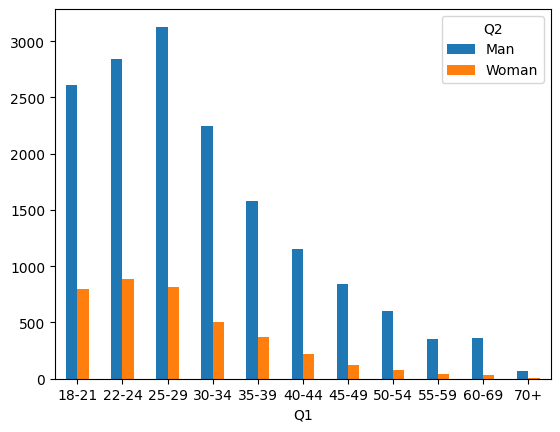

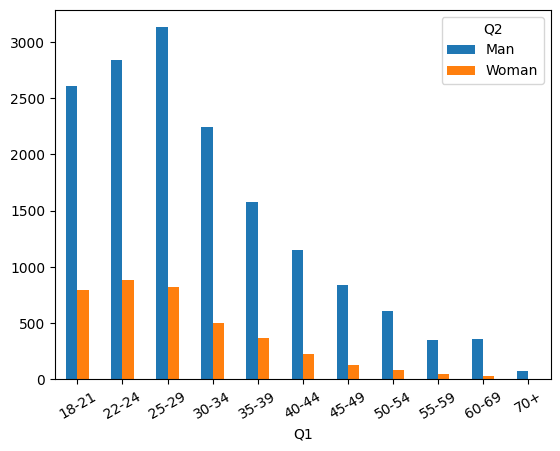

In [15]:
#crosstab으로 Q1 Q2 결과 합치기
q1q2 = pd.crosstab(answer["Q1"], answer["Q2"])

#Q1 Q2 bar plot 및 x 축 각도 조절
q1q2[["Man", "Woman"]].plot.bar()
q1q2[["Man", "Woman"]].plot.bar(rot=0)
q1q2[["Man", "Woman"]].plot.bar(rot=30)

<Axes: ylabel='Q1'>

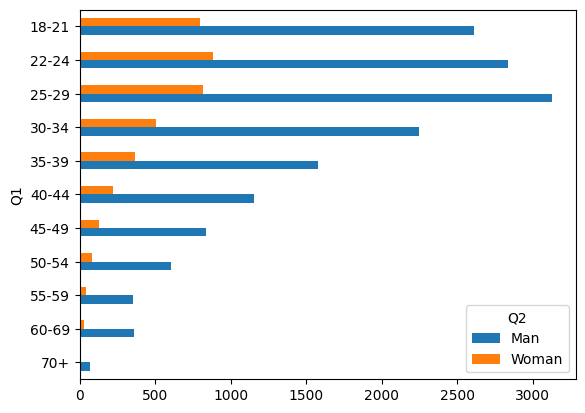

In [17]:
#내림차순으로 index 정렬하여 가로로 출력
q1q2[["Man", "Woman"]].sort_index(ascending=False).plot.barh()

<Axes: xlabel='Q1', ylabel='count'>

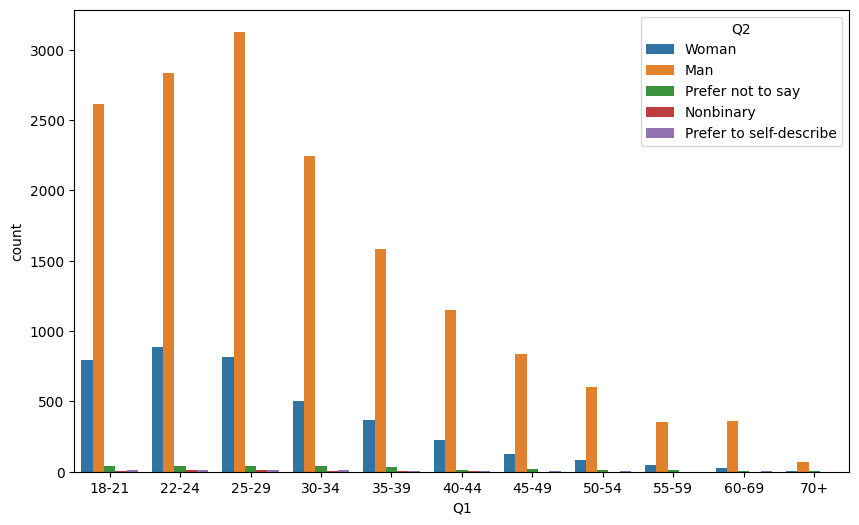

In [18]:
#plot 공간을 만들고
plt.figure(figsize = (10,6))

#Q1 value를 기준으로 출력하되 Q2 기준으로 구분
sns.countplot(data = answer.sort_values("Q1"), x = "Q1", hue = "Q2") 

In [20]:
#위에서 알아낸 패턴에 따라 countplot을 생성해주는 함수 선언

def show_countplot_by_qno(qno, fsize=(10,6), order=None):
    """_summary_

    Args:
        qno (_type_): _description_
        fsize (tuple, optional): _description_. Defaults to (10,6).
        order (_type_, optional): _description_. Defaults to None.
    """
    #만약 order값을 지정하지않아 기본값인 None이 들어갈 경우,
    #아래 order 옵션에서 에러가 나므로 index를 뽑아서 넘겨야한다.
    if not order:
        order = answer[qno].value_counts().index
    
    plt.figure(figsize = fsize)
    sns.countplot(
        data = answer,
        y = qno,
        order = order,
        palette='Blues_r'
    ).set_title(question[qno])

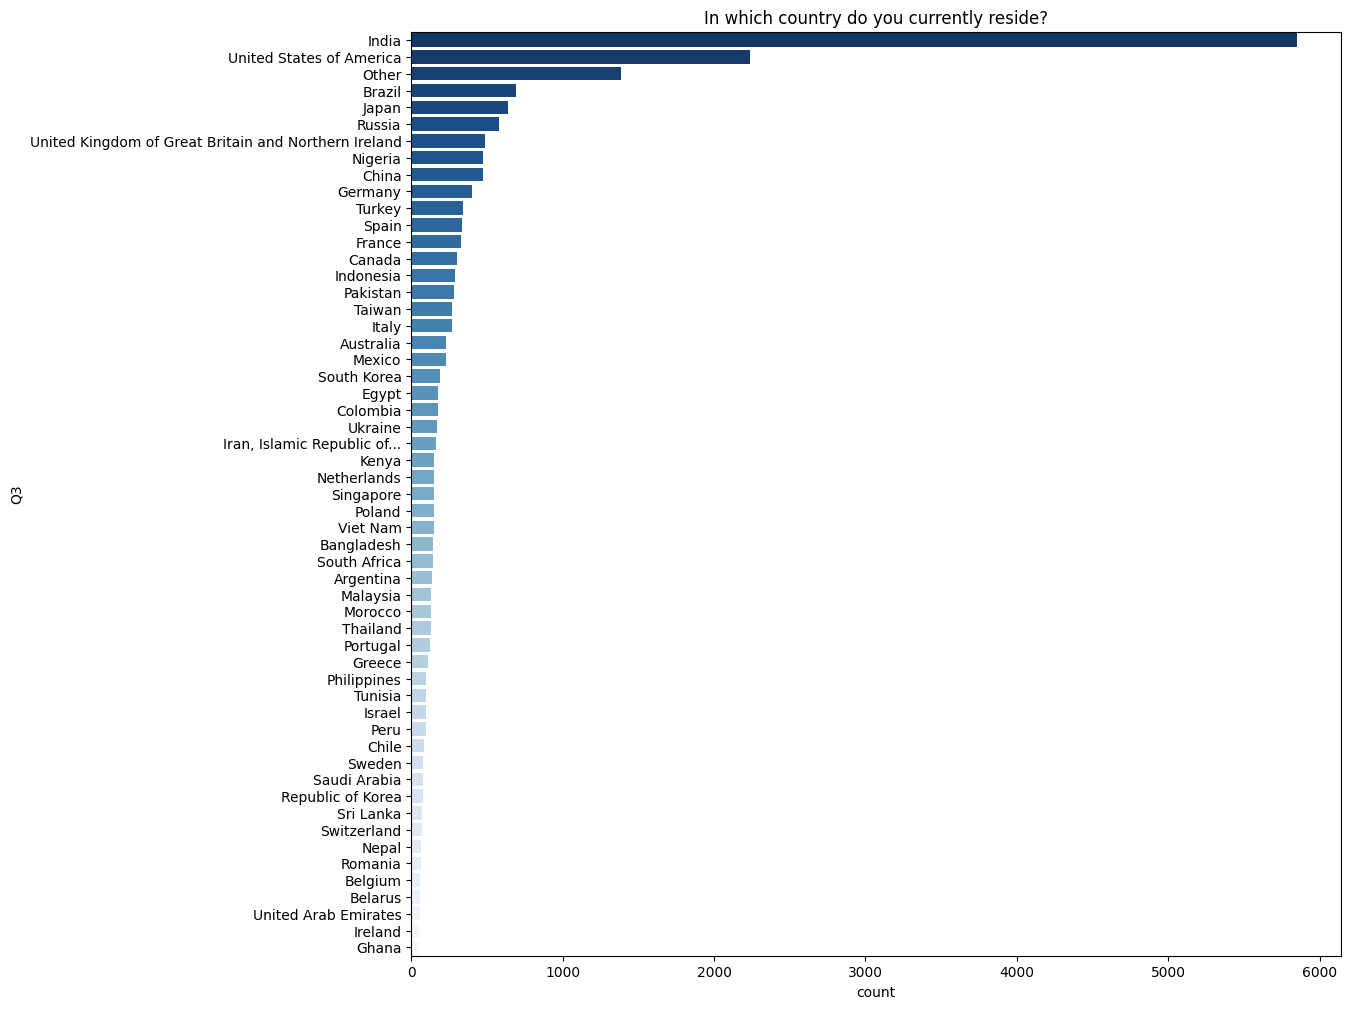

In [26]:
#함수를 활용해 Q3 항목 countplot
show_countplot_by_qno("Q3", fsize=(12,12))

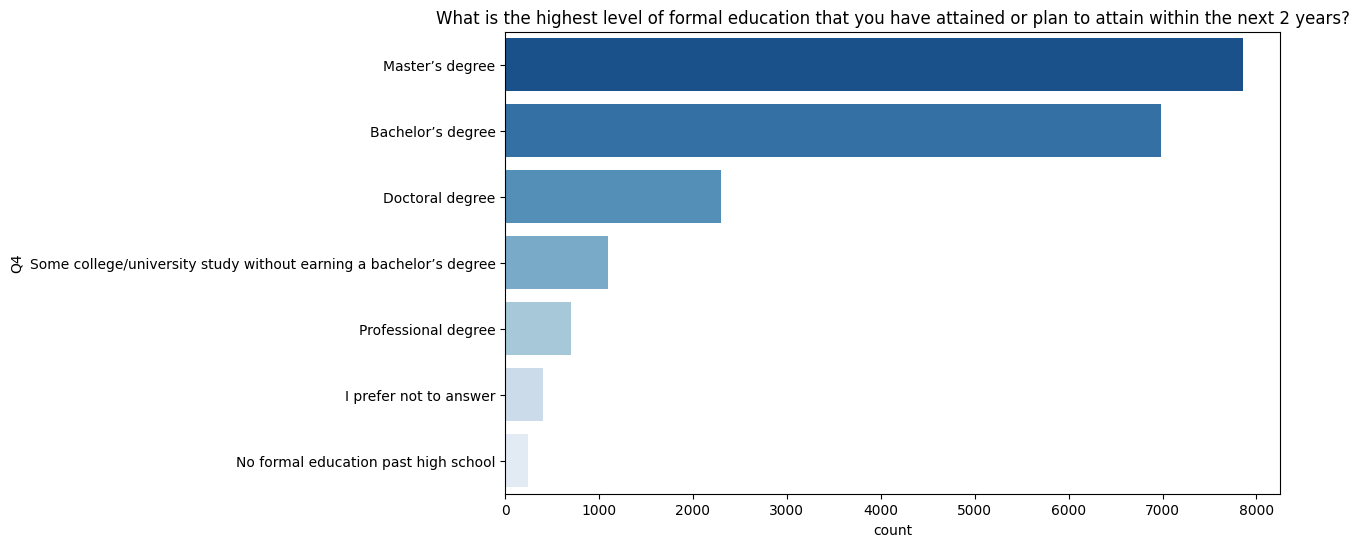

In [22]:
#함수를 활용해 Q4 항목 countplot
show_countplot_by_qno("Q4")

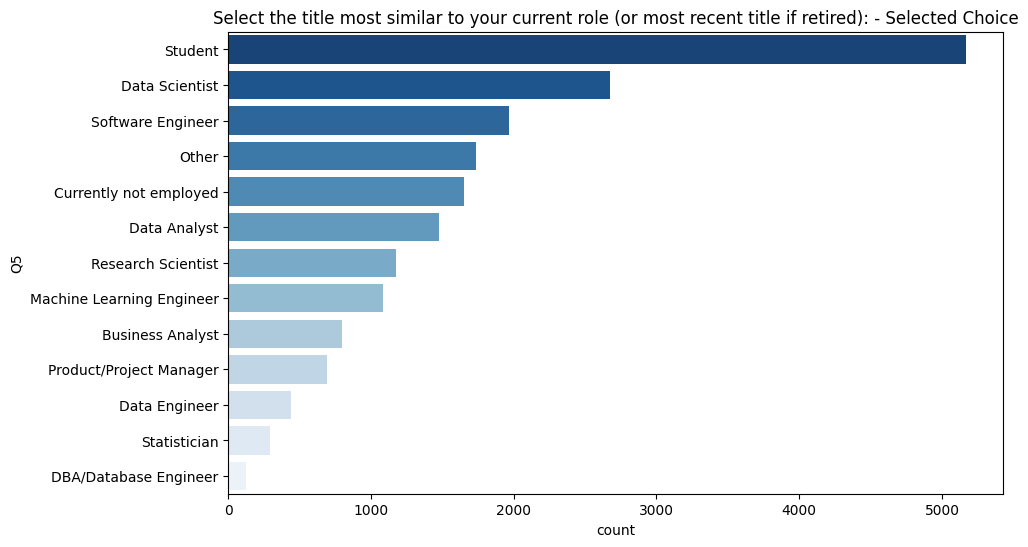

In [23]:
#함수를 활용해 Q5 항목 countplot
show_countplot_by_qno("Q5")

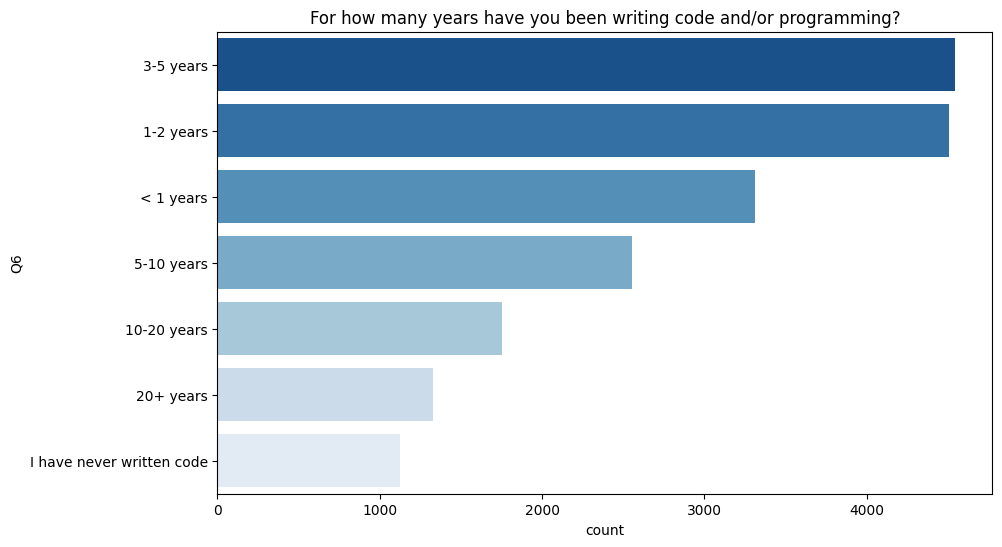

In [24]:
#함수를 활용해 Q6 항목 countplot
show_countplot_by_qno("Q6")

In [29]:
#함수를 활용해 Q7 항목 countplot -> err -> 왜?
show_countplot_by_qno("Q7") #Q7 파트가 나뉘어져 있음

KeyError: "None of [Index(['What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python',\n       'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R',\n       'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL',\n       'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C',\n       'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C++',\n       'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Java',\n       'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Javascript',\n       'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Julia',\n       'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Swift',\n       'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Bash',\n       'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - MATLAB',\n       'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - None',\n       'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Other'],\n      dtype='object')] are in the [columns]"

In [27]:
#question에서 Q6이후 값 확인
question[7:20]

Q7_Part_1     What programming languages do you use on a reg...
Q7_Part_2     What programming languages do you use on a reg...
Q7_Part_3     What programming languages do you use on a reg...
Q7_Part_4     What programming languages do you use on a reg...
Q7_Part_5     What programming languages do you use on a reg...
Q7_Part_6     What programming languages do you use on a reg...
Q7_Part_7     What programming languages do you use on a reg...
Q7_Part_8     What programming languages do you use on a reg...
Q7_Part_9     What programming languages do you use on a reg...
Q7_Part_10    What programming languages do you use on a reg...
Q7_Part_11    What programming languages do you use on a reg...
Q7_Part_12    What programming languages do you use on a reg...
Q7_OTHER      What programming languages do you use on a reg...
Name: 0, dtype: object

In [34]:
#Q7 항목 처리
q7_title = question.filter(regex="Q7")[0].split("-")[0]
q7_title

'What programming languages do you use on a regular basis? (Select all that apply) '

In [35]:
#Q7이 포함된 답안 컬럼 뽑아내기
answer_Q7 = answer.filter(regex="Q7")
answer_Q7

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
1,Python,R,SQL,C,NaN,NaN,Javascript,NaN,NaN,NaN,MATLAB,NaN,Other
2,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,Java,Javascript,NaN,NaN,Bash,NaN,NaN,NaN
4,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN
5,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20034,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20035,Python,NaN,SQL,C,NaN,Java,Javascript,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
answer_Q7_desc = answer_Q7.describe() #describe() : 기본 통계값 분석
answer_Q7_desc

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
count,15530,4277,7535,3315,3827,3367,2995,262,198,1776,2217,0,1945
unique,1,1,1,1,1,1,1,1,1,1,1,0,1
top,Python,R,SQL,C,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,NaN,Other
freq,15530,4277,7535,3315,3827,3367,2995,262,198,1776,2217,NaN,1945


In [45]:
#describe 데이터 프레임 이용하기
answer_Q7_count = answer_Q7_desc.loc[["count", "top"]].T
answer_Q7_count = answer_Q7_count.set_index("top").sort_values("count", ascending=False)
answer_Q7_count

,count
top,
Python,15530
SQL,7535
R,4277
C++,3827
Java,3367
C,3315
Javascript,2995
MATLAB,2217
Other,1945


Text(0.5, 1.0, 'What programming languages do you use on a regular basis? (Select all that apply) ')

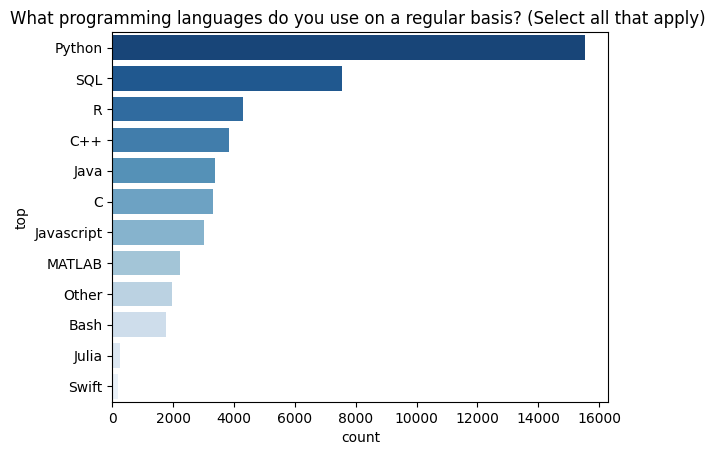

In [56]:
#Q7 항목 plot
sns.barplot(
    data=answer_Q7_count, 
    y=answer_Q7_count.index, 
    x="count", 
    palette="Blues_r"
).set_title(q7_title)

In [58]:
#question 번호에 따라 question title을 뽑아주는 함수 생성
def get_question_title_by_qno(qno):
    if qno in question.index:
        return question[qno]
    else:
        return question.filter(regex=qno)[0].split("-")[0]

In [61]:
#함수를 활용해 Q7 title 확인
get_question_title_by_qno("Q7")

'What programming languages do you use on a regular basis? (Select all that apply) '

In [72]:
#multiple choice 문항의 답안을 처리해주는 함수생성
def get_multiple_choice_answer_by_qno(qno):
    return answer.filter(regex=qno).describe().loc[["count", "top"]].T.set_index("top").sort_values(by="count", ascending=False)

get_multiple_choice_answer_by_qno("Q9")

,count
top,
"Jupyter (JupyterLab, Jupyter Notebooks, etc)",11211
Visual Studio Code (VSCode),5873
PyCharm,5099
RStudio,3826
Spyder,3290
Notepad++,3132
Sublime Text,2452
Visual Studio,2445
MATLAB,1604


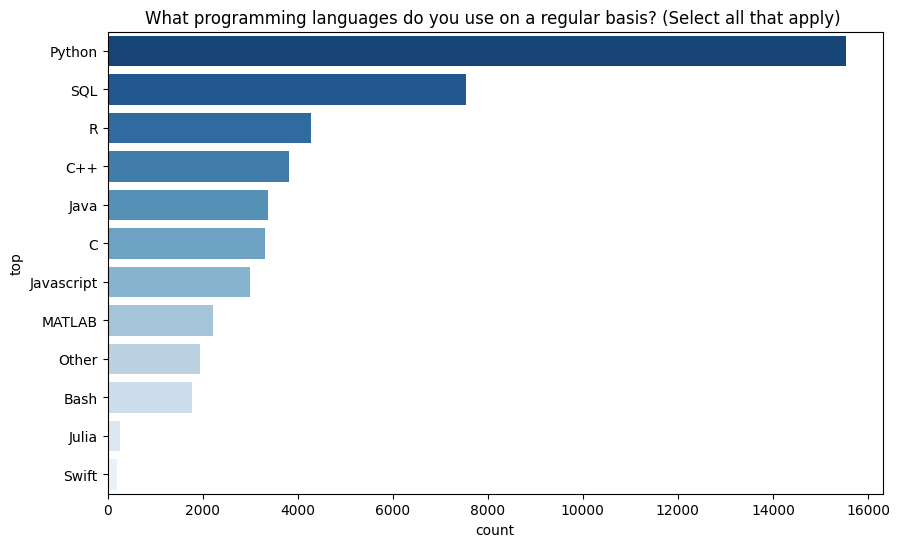

In [77]:
#multiple choice 문항을 bar plot으로 보여주는 함수 생성
def show_multiple_choice_bar_plot_by_qno(qno):
    ans = get_multiple_choice_answer_by_qno(qno)
    plt.figure(figsize=(10,6))
    sns.barplot(
        data=ans, 
        y=ans.index, 
        x="count", 
        palette="Blues_r"
    ).set_title(get_question_title_by_qno(qno))

show_multiple_choice_bar_plot_by_qno("Q7")

In [83]:
#multiple choice 문항의 선택지 받아오기
q7_cols = answer.filter(regex="Q7").describe().loc["top"].tolist()
q7_cols

['Python',
 'R',
 'SQL',
 'C',
 'C++',
 'Java',
 'Javascript',
 'Julia',
 'Swift',
 'Bash',
 'MATLAB',
 nan,
 'Other']

In [101]:
#Q2 Q7 으로 시작하는 모든 문항의 답안 받아오기
q2q7 = answer.filter(regex="Q2$|Q7")

#Q2를 기준으로 그룹화
q2q7_cnt = q2q7.groupby("Q2").count()

#column 재지정
q2q7_cnt.columns = q7_cols

q2q7_cnt


,Python,R,SQL,C,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,NaN,Other
Q2,,,,,,,,,,,,,
Man,12530,3299,5940,2552,3063,2641,2487,238,171,1561,1679,0,1634
Nonbinary,41,14,20,8,10,1,6,1,2,10,7,0,7
Prefer not to say,182,48,97,36,43,42,41,5,4,31,28,0,31
Prefer to self-describe,41,8,18,12,13,9,12,2,1,10,6,0,7
Woman,2736,908,1460,707,698,674,449,16,20,164,497,0,266


<Axes: >

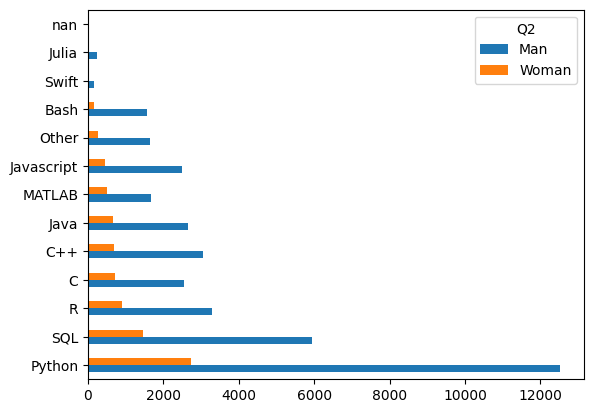

In [99]:
#Man과 Woman에 해당하는 데이터를 받아 bar plot
q2q7_cnt.loc[['Man','Woman']].T.sort_values("Woman", ascending=False).plot.barh()

In [154]:
question.index

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3',
       ...
       'Q35_B_Part_2', 'Q35_B_Part_3', 'Q35_B_Part_4', 'Q35_B_Part_5',
       'Q35_B_Part_6', 'Q35_B_Part_7', 'Q35_B_Part_8', 'Q35_B_Part_9',
       'Q35_B_Part_10', 'Q35_B_OTHER'],
      dtype='object', length=355)

In [105]:
#앞에서 만들었던 함수를 조합하여 count plot, multiple choice 문항 bar plot 두개 모두 가능한 plot 함수 만들기
def show_plot_by_qno(qno):
    if qno in question.index:
        show_countplot_by_qno(qno)
    else:
        show_multiple_choice_bar_plot_by_qno(qno)

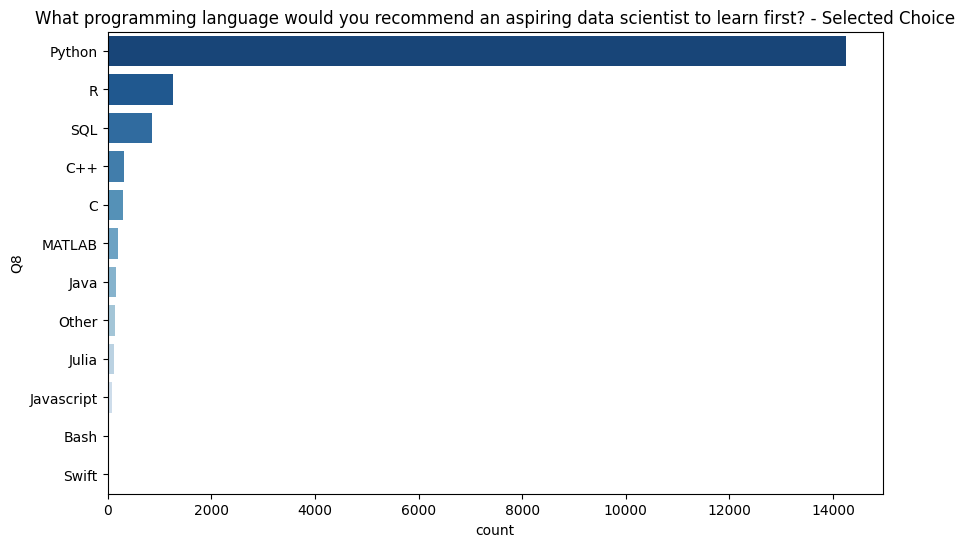

In [106]:
#위 함수를 사용하여 Q8 확인
show_plot_by_qno("Q8")

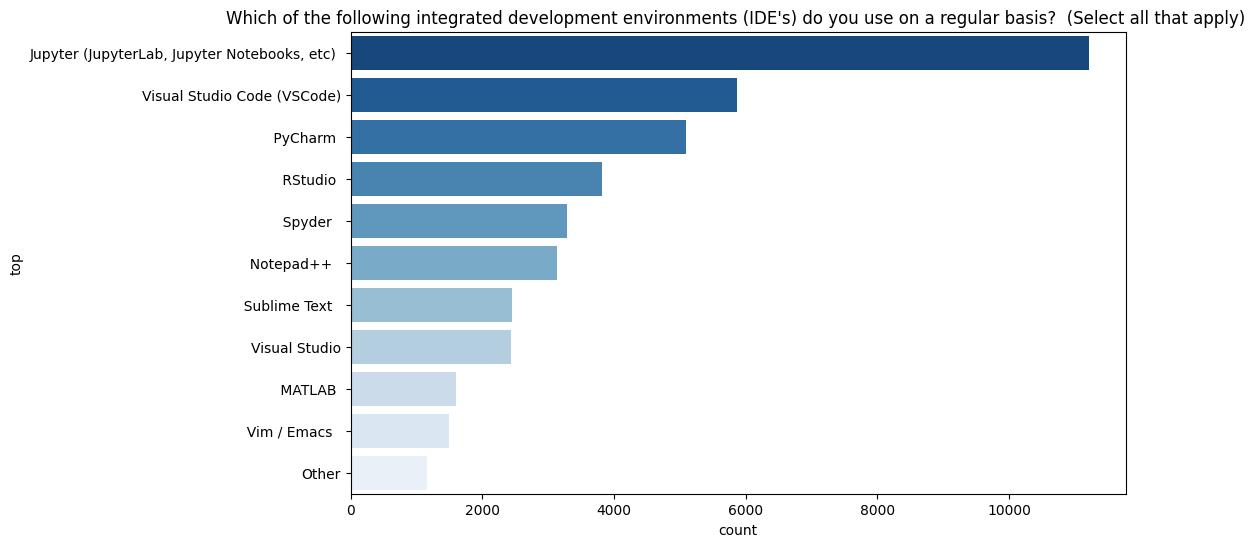

In [107]:
#위 함수를 사용하여 Q9 확인
show_plot_by_qno("Q9")

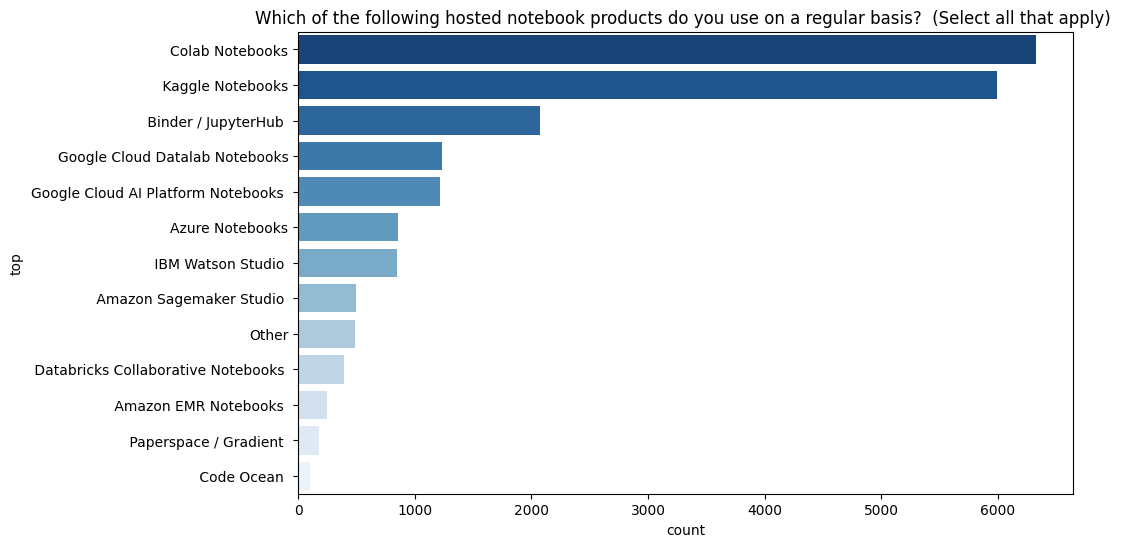

In [108]:
#위 함수를 사용하여 Q10 확인
show_plot_by_qno("Q10")

In [ ]:
#위 함수를 사용하여 Q11 확인
show_plot_by_qno("Q11")

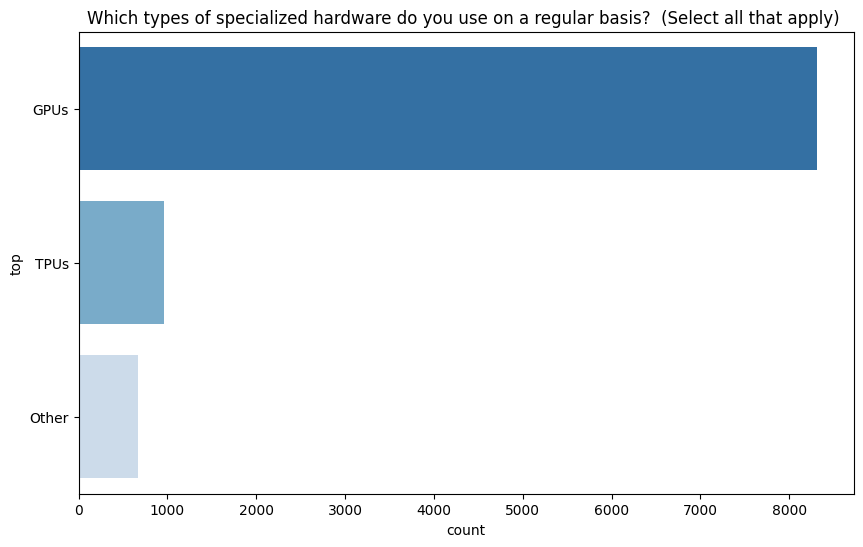

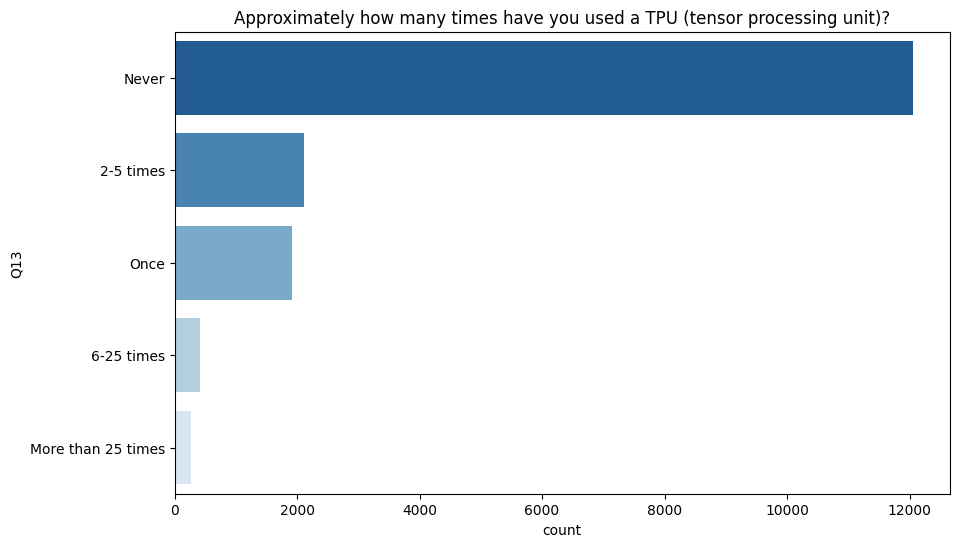

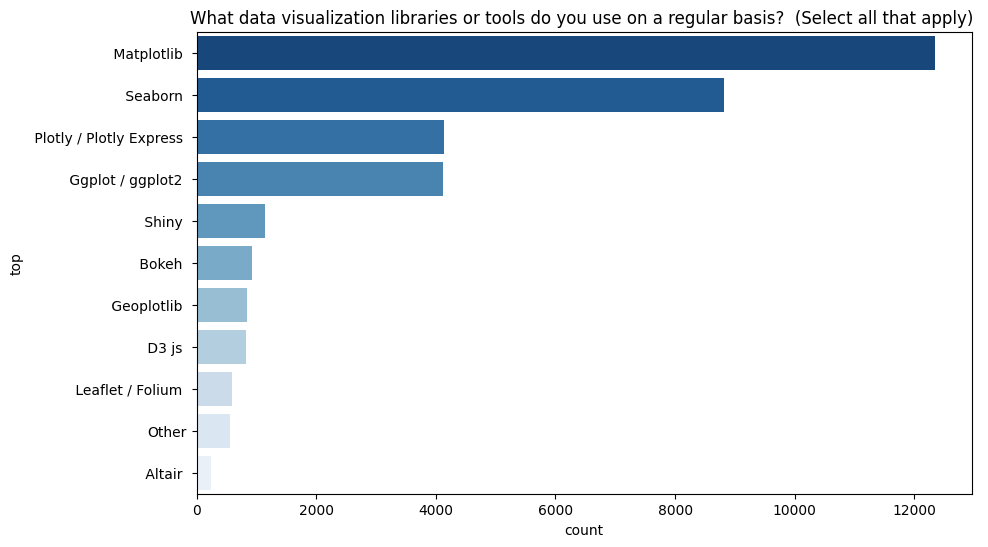

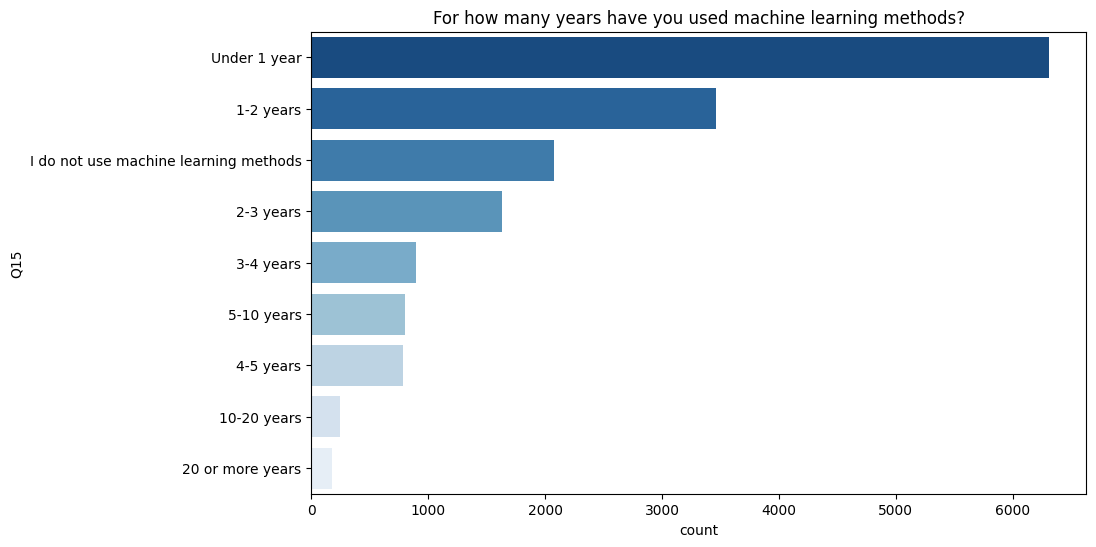

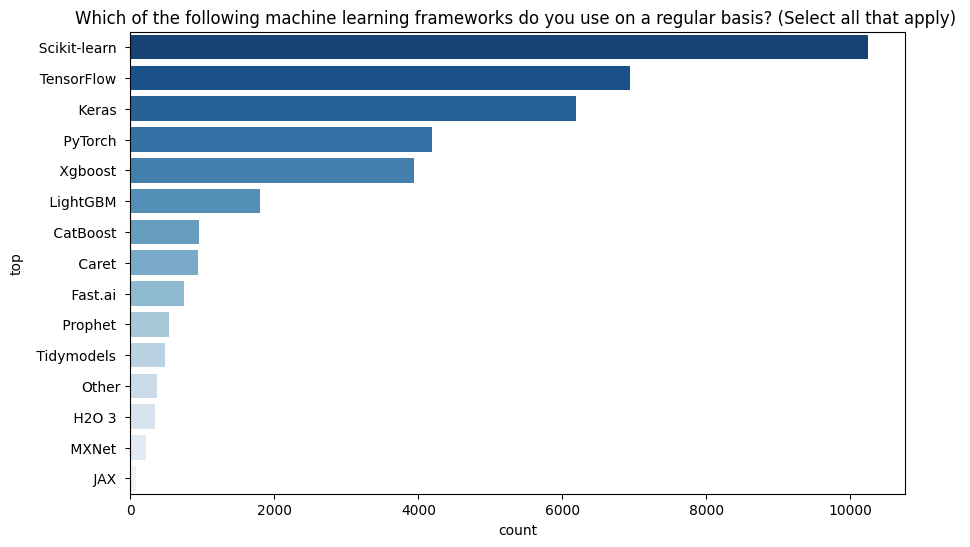

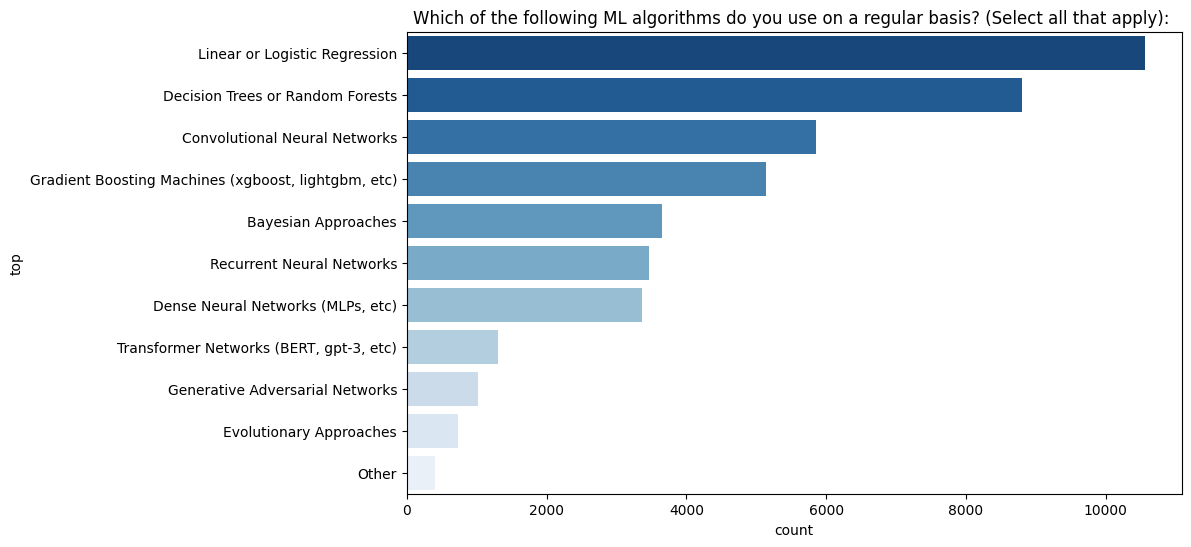

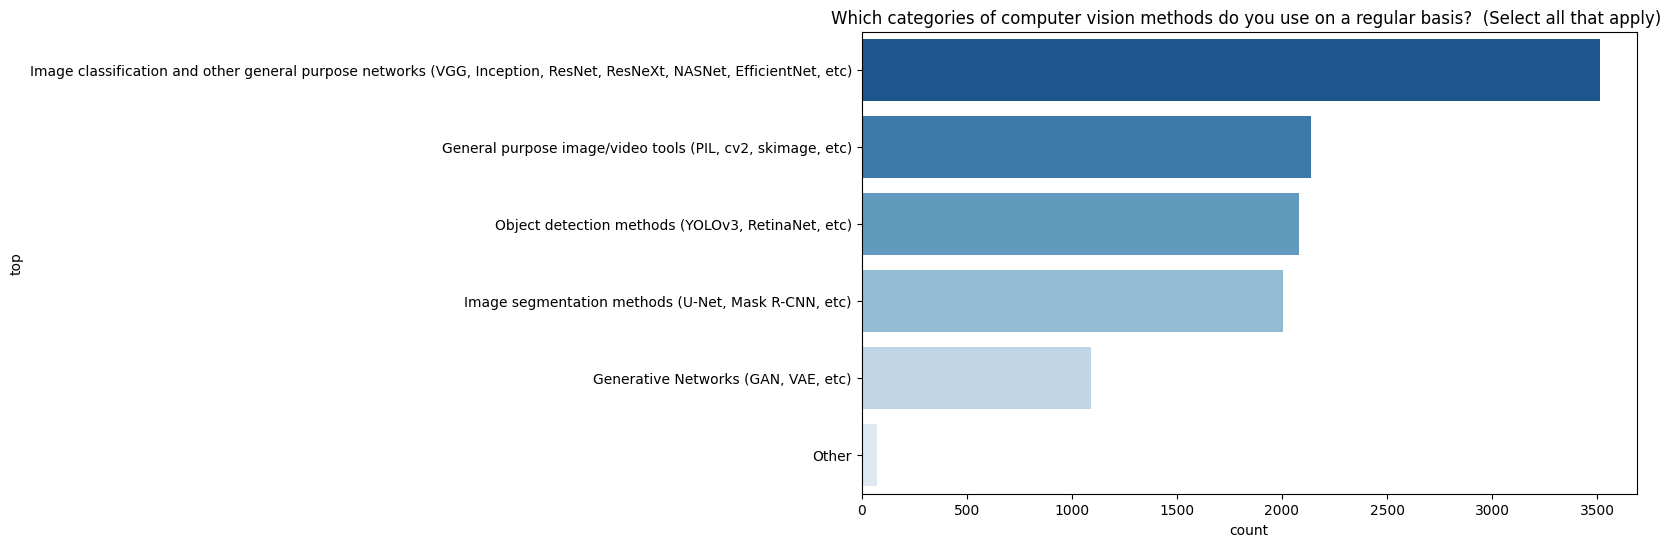

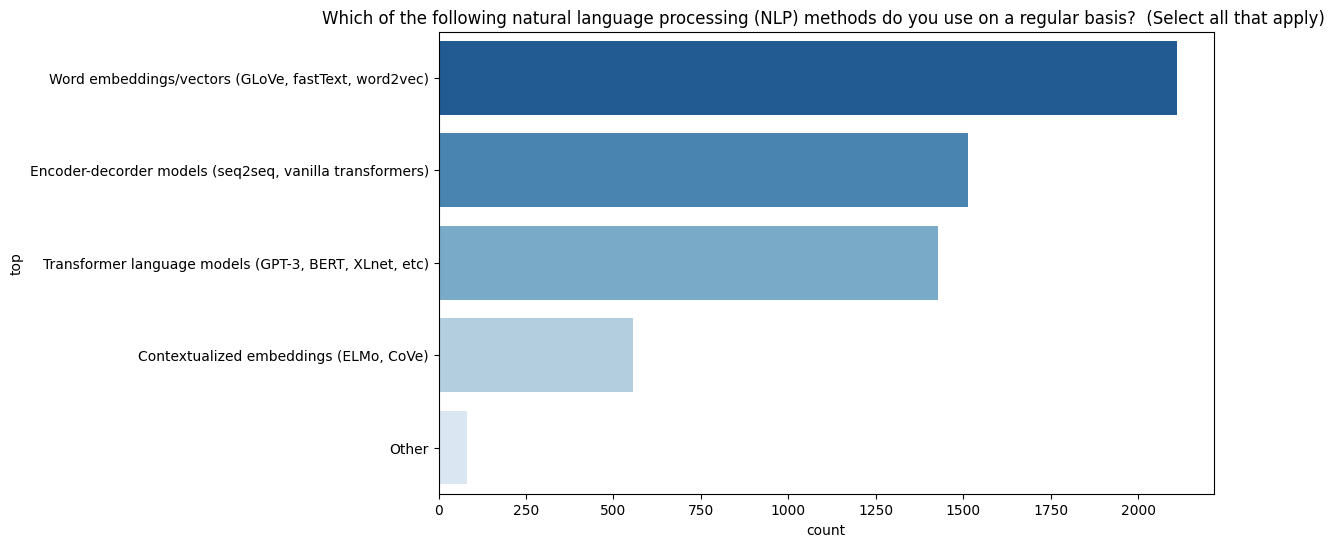

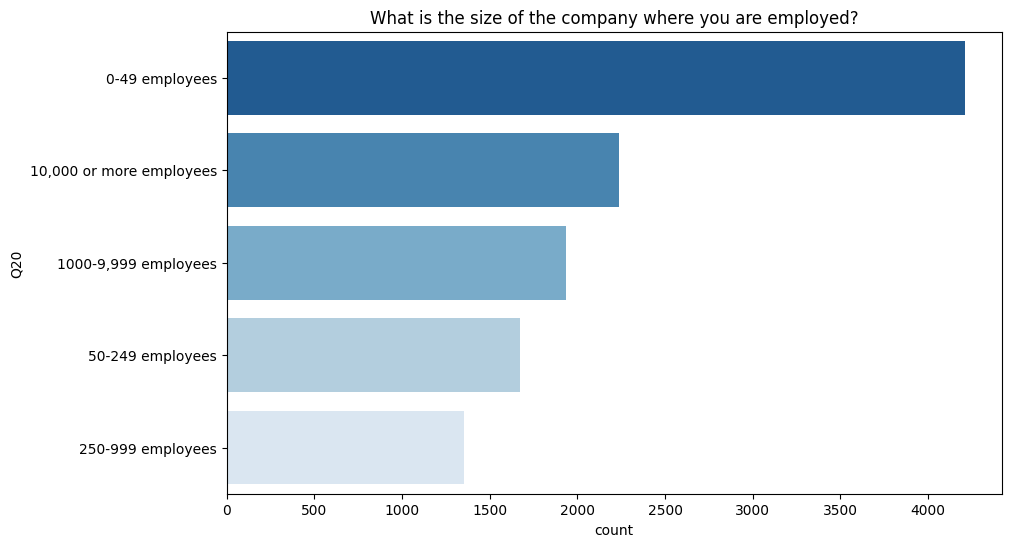

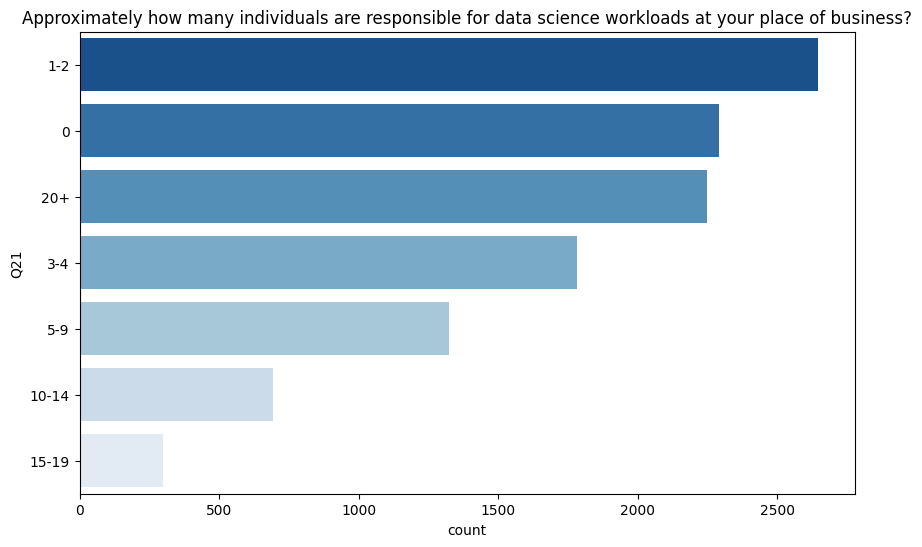

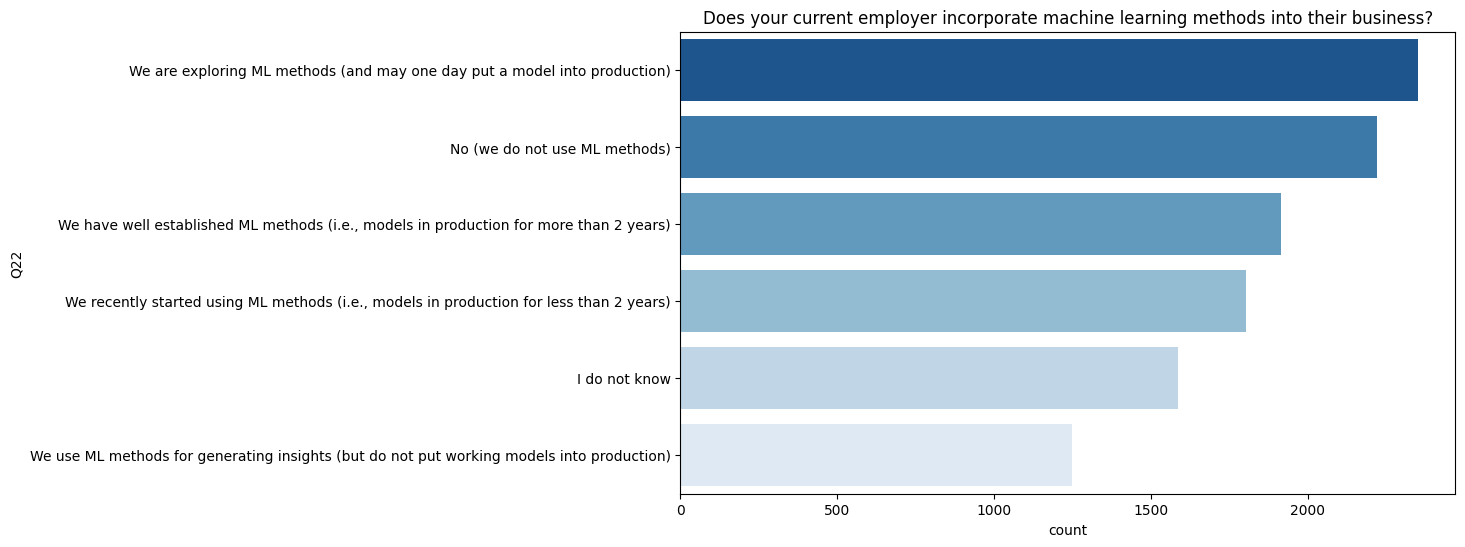

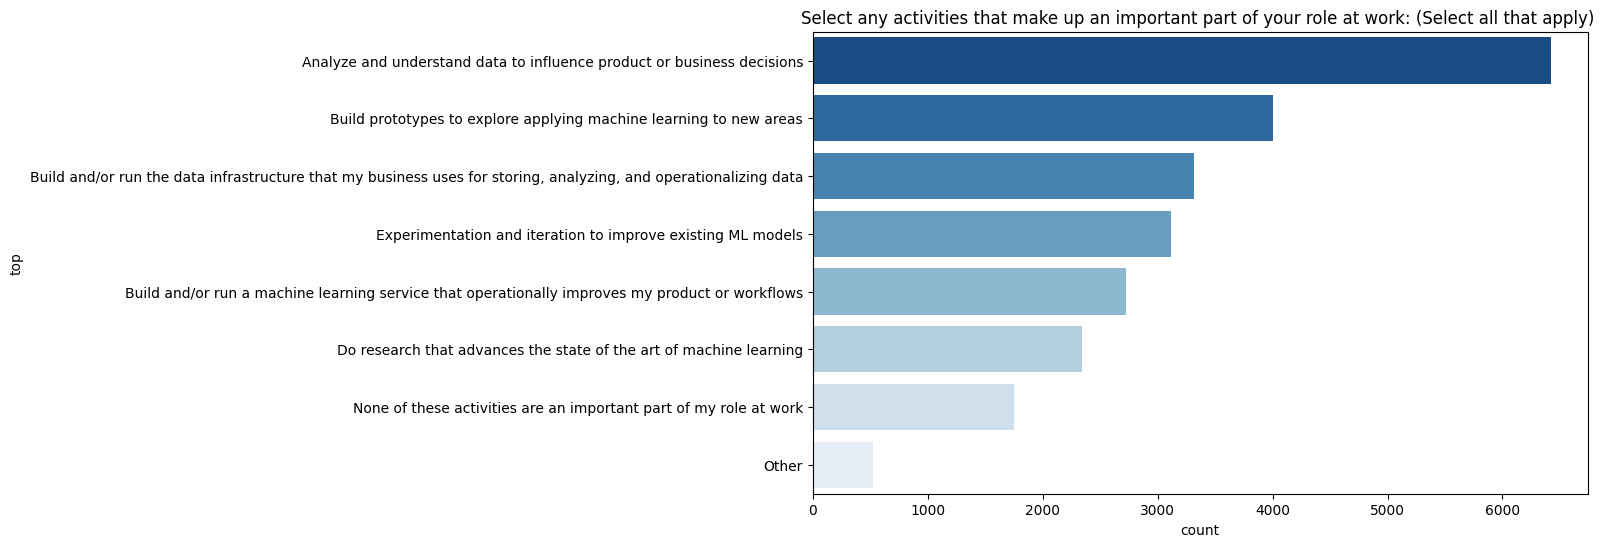

In [110]:
#위 함수를 사용하여 Q12 ~ Q23 확인
show_plot_by_qno("Q12")
show_plot_by_qno("Q13")
show_plot_by_qno("Q14")
show_plot_by_qno("Q15")
show_plot_by_qno("Q16")
show_plot_by_qno("Q17")
show_plot_by_qno("Q18")
show_plot_by_qno("Q19")
show_plot_by_qno("Q20")
show_plot_by_qno("Q21")
show_plot_by_qno("Q22")
show_plot_by_qno("Q23")

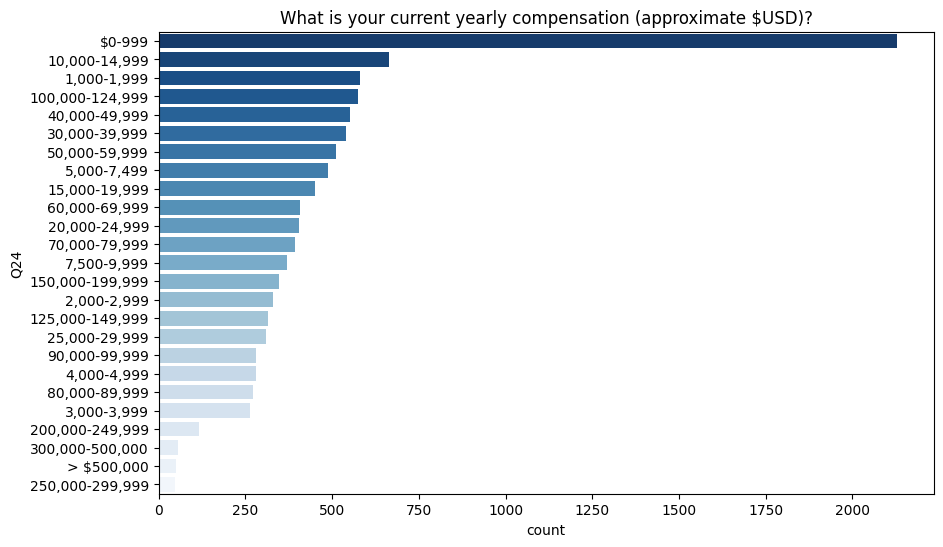

In [113]:
show_plot_by_qno("Q24") #보기에 불편한점?

In [121]:
#Q24
q24_count = answer["Q24"].value_counts().reset_index()
q24_count.columns = ["range", "count"]
q24_count

,range,count
0,$0-999,2128
1,"10,000-14,999",665
2,"1,000-1,999",581
3,"100,000-124,999",573
4,"40,000-49,999",552
5,"30,000-39,999",540
6,"50,000-59,999",510
7,"5,000-7,499",488
8,"15,000-19,999",449
9,"60,000-69,999",408


In [140]:
#expand = True 하면 split된 결과를 바로 컬럼으로 생성해준다
#",|\$|>", "", regex=True
q24_count["min"] = q24_count["range"].str.split("-", expand=True)[0].replace(",|\$|>", "", regex=True).astype(int)
q24_count["max"] = q24_count["range"].str.split("-", expand=True)[1].replace(",|\$|>", "", regex=True)
q24_count = q24_count.sort_values("min")


Text(0.5, 1.0, 'What is your current yearly compensation (approximate $USD)?')

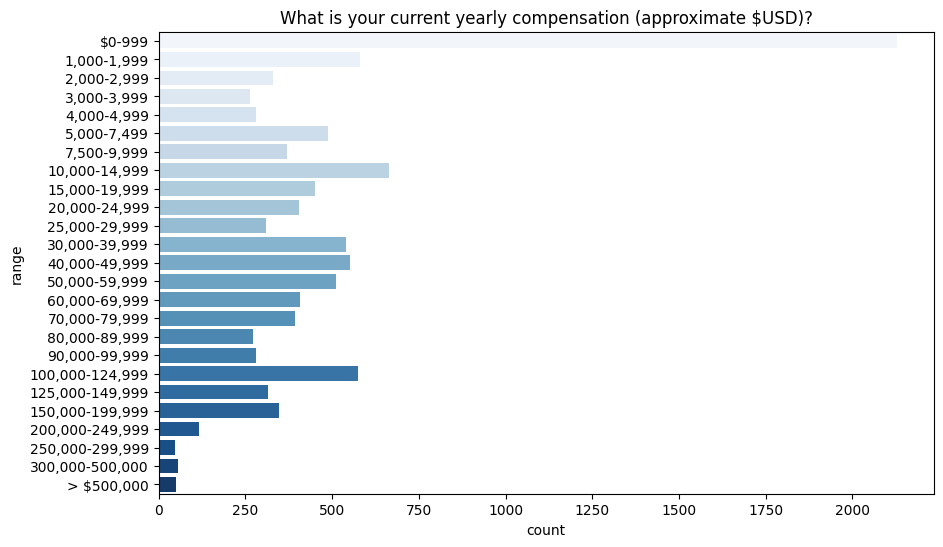

In [142]:
#count가아닌 range 기준으로 정렬하여 Q24 plot
plt.figure(figsize=(10,6))
sns.barplot(
    data=q24_count,
    y="range",
    x="count",
    palette="Blues"
).set_title(get_question_title_by_qno("Q24"))

In [144]:
#range 열을 order로 사용하기위해 list로 변경
q24_cols = q24_count["range"].to_list()
q24_cols

['$0-999',
 '1,000-1,999',
 '2,000-2,999',
 '3,000-3,999',
 '4,000-4,999',
 '5,000-7,499',
 '7,500-9,999',
 '10,000-14,999',
 '15,000-19,999',
 '20,000-24,999',
 '25,000-29,999',
 '30,000-39,999',
 '40,000-49,999',
 '50,000-59,999',
 '60,000-69,999',
 '70,000-79,999',
 '80,000-89,999',
 '90,000-99,999',
 '100,000-124,999',
 '125,000-149,999',
 '150,000-199,999',
 '200,000-249,999',
 '250,000-299,999',
 '300,000-500,000',
 '> $500,000']

Text(0.5, 1.0, 'SK Compensation')

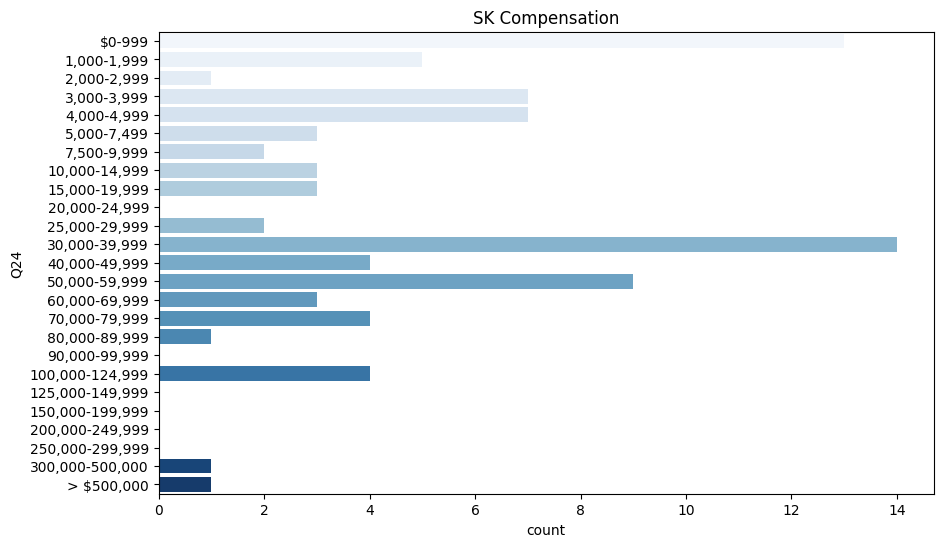

In [148]:
#한국 정보만 뽑아서 보기
q3_korea = answer[answer["Q3"].isin(["South Korea"])]

plt.figure(figsize=(10, 6))
sns.countplot(
    data=q3_korea,
    y="Q24",
    order=q24_cols,
    palette="Blues"
).set_title("SK Compensation")

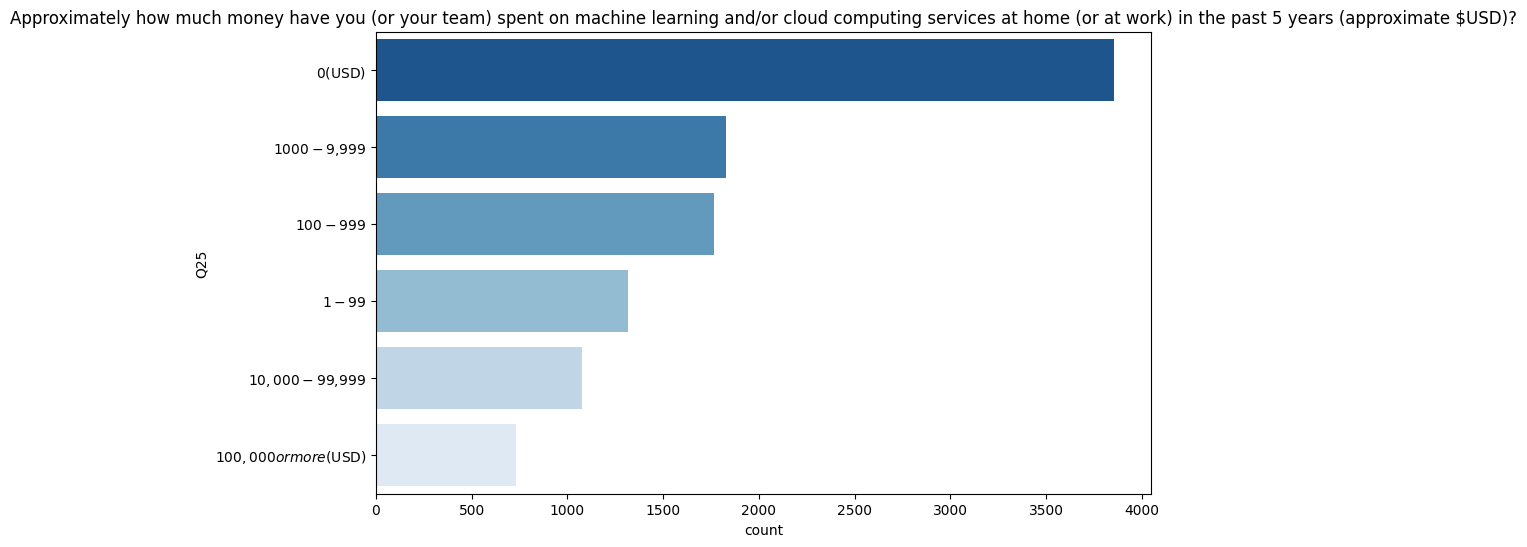

In [149]:
#함수를 사용하여 Q25 확인
show_plot_by_qno("Q25")

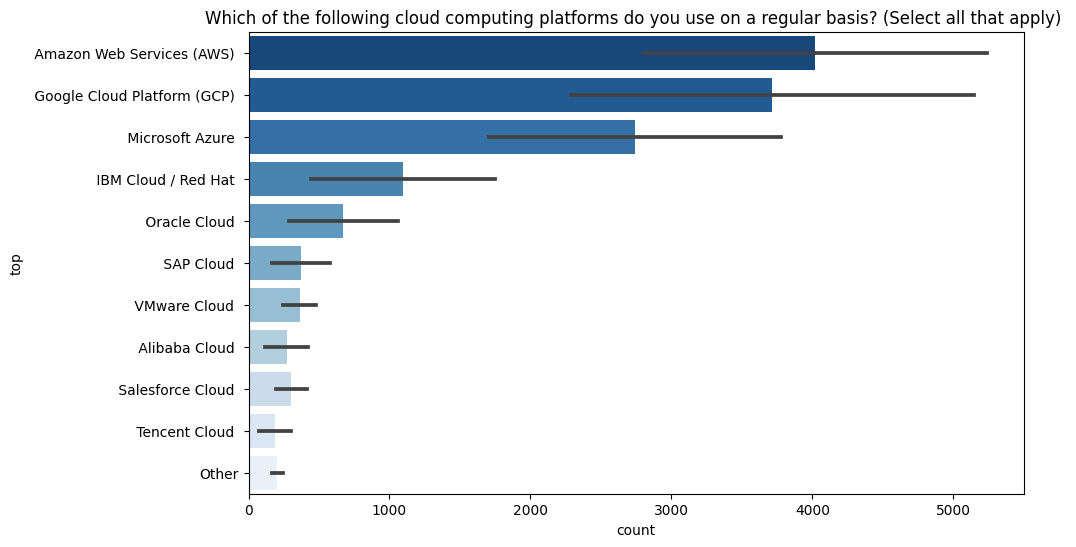

In [150]:
#함수를 사용하여 Q26 확인 - 새로운줄이 나타난이유?
# Q26은 A-type, B-type 두 type이 있어서
show_plot_by_qno("Q26")

In [151]:
#Q26을 포함하는 컬럼 확인
answer.filter(regex="Q26").iloc[0]

Q26_A_Part_1                               NaN
Q26_A_Part_2                               NaN
Q26_A_Part_3                               NaN
Q26_A_Part_4                               NaN
Q26_A_Part_5                               NaN
Q26_A_Part_6                               NaN
Q26_A_Part_7                               NaN
Q26_A_Part_8                               NaN
Q26_A_Part_9                               NaN
Q26_A_Part_10                              NaN
Q26_A_Part_11                              NaN
Q26_A_OTHER                                NaN
Q26_B_Part_1        Amazon Web Services (AWS) 
Q26_B_Part_2                  Microsoft Azure 
Q26_B_Part_3      Google Cloud Platform (GCP) 
Q26_B_Part_4              IBM Cloud / Red Hat 
Q26_B_Part_5                               NaN
Q26_B_Part_6                        SAP Cloud 
Q26_B_Part_7                               NaN
Q26_B_Part_8                               NaN
Q26_B_Part_9                               NaN
Q26_B_Part_10

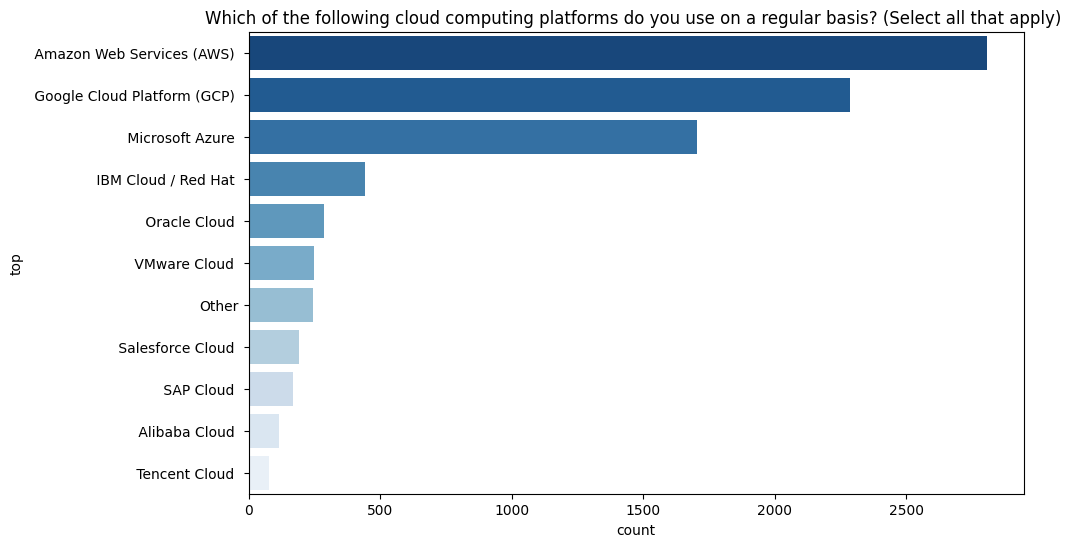

In [152]:
#Q26_A 확인
show_plot_by_qno("Q26_A")

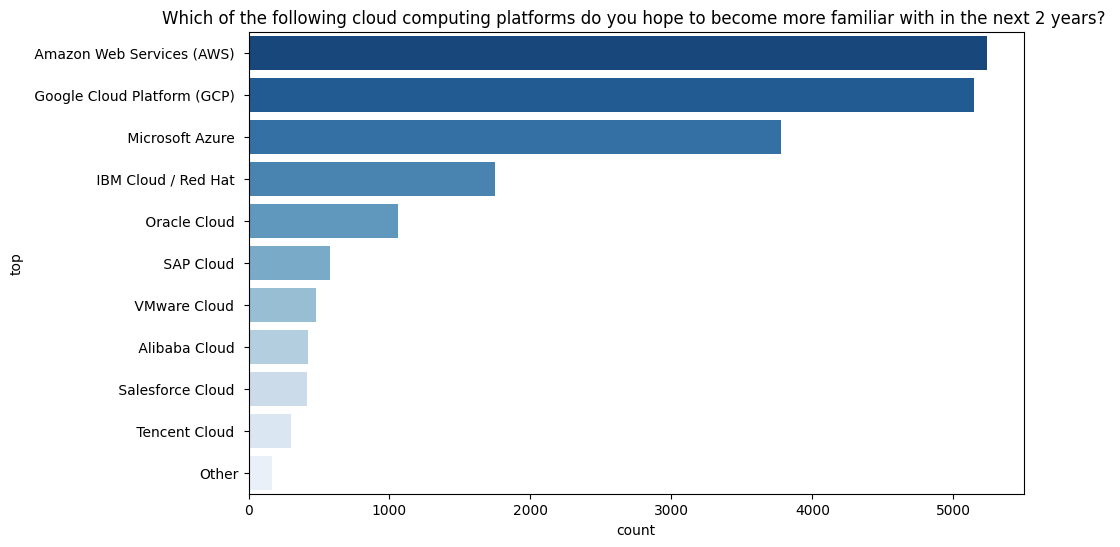

In [153]:
#Q26_B 확인
show_plot_by_qno("Q26_B")

## Q27_A ~ Q38 은 직접 확인해보세요!

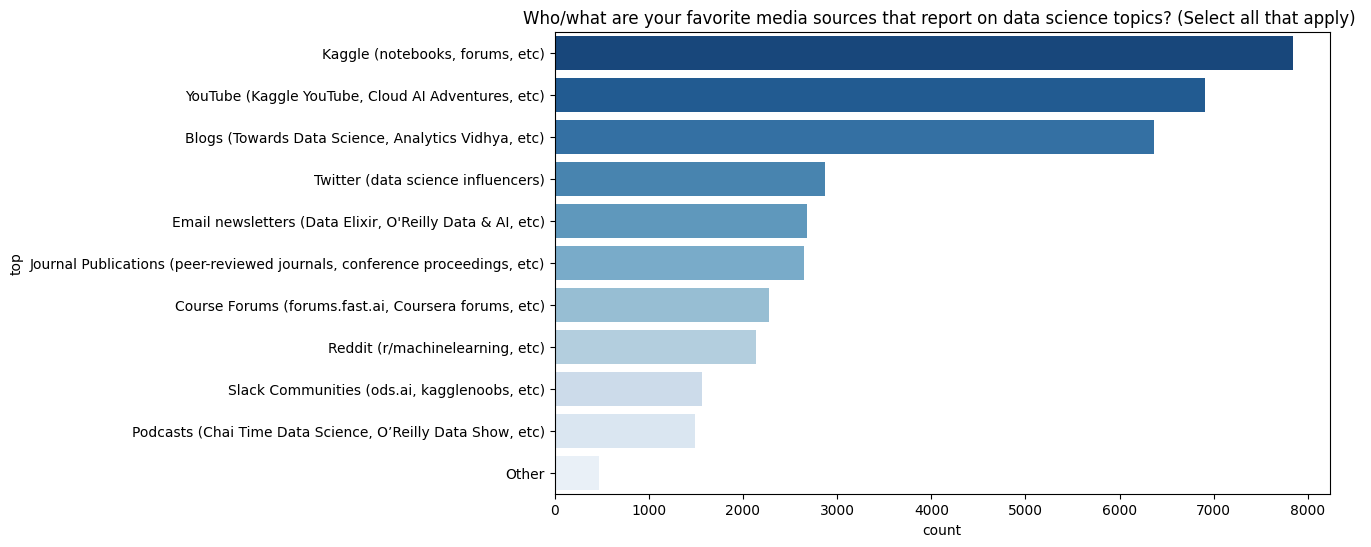

In [155]:
#마지막 문항 Q39 확인
show_plot_by_qno("Q39")